In [ ]:
import sqlite3
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker()
Faker.seed(42)
np.random.seed(42)
random.seed(42)

# Connect to SQLite 
conn = sqlite3.connect("synthetic_recommendation.db")
cursor = conn.cursor()

# --- Step 1: Create SQL Tables ---
create_sql = """
CREATE TABLE IF NOT EXISTS customer_profile (
    CustomerID TEXT PRIMARY KEY,
    CustomerTypeCode TEXT,
    ProfitCentre INTEGER,
    LOR_Months INTEGER,
    Gender TEXT,
    Age INTEGER,
    MaritalStatus TEXT,
    Income INTEGER,
    Emirate TEXT,
    NationalityRegion TEXT,
    Flag_SalaryTransfer TEXT
);

CREATE TABLE IF NOT EXISTS product_summary (
    CustomerID TEXT PRIMARY KEY,
    CC_Limit INTEGER,
    CC_SpendVolume INTEGER,
    DBR_Internal REAL,
    MO_Disbursed INTEGER,
    AL_Disbursed INTEGER,
    PL_Disbursed INTEGER,
    SL_Disbursed INTEGER,
    MO_Balance INTEGER,
    AL_Balance INTEGER,
    PL_Balance INTEGER,
    SL_Balance INTEGER,
    MO_Count INTEGER,
    AL_Count INTEGER,
    PL_Count INTEGER,
    SL_Count INTEGER,
    Total_FD_Count INTEGER,
    Total_FD_Balance INTEGER,
    Total_CASA_Count INTEGER,
    Total_AVG_CASA_BALANCE INTEGER,
    TOTAL_Products INTEGER
);

CREATE TABLE IF NOT EXISTS mcc_category (
    MCC INTEGER PRIMARY KEY,
    MCC_Name TEXT,
    MCG_Name TEXT,
    Period TEXT
);

CREATE TABLE IF NOT EXISTS transactions (
    CustomerID TEXT,
    TxnDate TEXT,
    Category TEXT,
    BillingAmount REAL,
    TxnLoc TEXT,
    MercCountry TEXT,
    Gateway TEXT,
    Channel TEXT,
    MCC INTEGER,
    Description TEXT,
    AcquirerBin INTEGER
);
"""
cursor.executescript(create_sql)


In [12]:
# Parameters
num_customers = 500
num_transactions = 2000
customer_ids = [f'CUST{str(i).zfill(4)}' for i in range(1, num_customers + 1)]

# --- customer_profile ---
customer_profile = pd.DataFrame({
    'CustomerID': customer_ids,
    'CustomerTypeCode': np.random.choice(['R', 'P', 'S'], size=num_customers),
    'ProfitCentre': np.random.randint(1000, 1100, size=num_customers),
    'LOR_Months': np.random.randint(1, 120, size=num_customers),
    'Gender': np.random.choice(['M', 'F'], size=num_customers),
    'Age': np.random.randint(21, 65, size=num_customers),
    'MaritalStatus': np.random.choice(['Single', 'Married'], size=num_customers),
    'Income': np.random.randint(3000, 50000, size=num_customers),
    'Emirate': np.random.choice(['DXB', 'AUH', 'SHJ', 'AJM'], size=num_customers),
    'NationalityRegion': np.random.choice(['MENA', 'South Asia', 'Europe', 'Africa'], size=num_customers),
    'Flag_SalaryTransfer': np.random.choice(['Y', 'N'], size=num_customers)
})
customer_profile.to_sql('customer_profile', conn, if_exists='append', index=False)

# --- product_summary ---
product_summary = pd.DataFrame({
    'CustomerID': customer_ids,
    'CC_Limit': np.random.randint(5000, 50000, size=num_customers),
    'CC_SpendVolume': np.random.randint(1000, 30000, size=num_customers),
    'DBR_Internal': np.round(np.random.uniform(0.1, 0.9, size=num_customers), 2),
    'MO_Disbursed': np.random.randint(0, 200000, size=num_customers),
    'AL_Disbursed': np.random.randint(0, 150000, size=num_customers),
    'PL_Disbursed': np.random.randint(0, 100000, size=num_customers),
    'SL_Disbursed': np.random.randint(0, 50000, size=num_customers),
    'MO_Balance': np.random.randint(0, 150000, size=num_customers),
    'AL_Balance': np.random.randint(0, 100000, size=num_customers),
    'PL_Balance': np.random.randint(0, 80000, size=num_customers),
    'SL_Balance': np.random.randint(0, 30000, size=num_customers),
    'MO_Count': np.random.randint(0, 3, size=num_customers),
    'AL_Count': np.random.randint(0, 3, size=num_customers),
    'PL_Count': np.random.randint(0, 3, size=num_customers),
    'SL_Count': np.random.randint(0, 2, size=num_customers),
    'Total_FD_Count': np.random.randint(0, 5, size=num_customers),
    'Total_FD_Balance': np.random.randint(0, 100000, size=num_customers),
    'Total_CASA_Count': np.random.randint(1, 3, size=num_customers),
    'Total_AVG_CASA_BALANCE': np.random.randint(1000, 30000, size=num_customers),
    'TOTAL_Products': np.random.randint(1, 10, size=num_customers)
})
product_summary.to_sql('product_summary', conn, if_exists='append', index=False)

# --- mcc_category ---
mcc_codes = random.sample(range(1000, 9999), 50)
mcc_category = pd.DataFrame({
    'MCC': mcc_codes,
    'MCC_Name': [fake.company() for _ in range(50)],
    'MCG_Name': np.random.choice(['Retail', 'Food', 'Travel', 'Entertainment'], size=50),
    'Period': [f"202{random.randint(0, 3)}-Q{random.randint(1, 4)}" for _ in range(50)]
})
mcc_category.to_sql('mcc_category', conn, if_exists='append', index=False)

# --- transactions ---
transactions = pd.DataFrame({
    'CustomerID': np.random.choice(customer_ids, size=num_transactions),
    'TxnDate': [fake.date_between(start_date='-1y', end_date='today') for _ in range(num_transactions)],
    'Category': np.random.choice(['Retail', 'Food', 'Travel', 'Entertainment'], size=num_transactions),
    'BillingAmount': np.round(np.random.uniform(10, 1000, size=num_transactions), 2),
    'TxnLoc': [fake.city() for _ in range(num_transactions)],
    'MercCountry': [fake.country_code() for _ in range(num_transactions)],
    'Gateway': np.random.choice(['VISA', 'MasterCard', 'AMEX'], size=num_transactions),
    'Channel': np.random.choice(['Online', 'POS', 'Mobile'], size=num_transactions),
    'MCC': np.random.choice(mcc_codes, size=num_transactions),
    'Description': [fake.catch_phrase() for _ in range(num_transactions)],
    'AcquirerBin': np.random.randint(100000, 999999, size=num_transactions)
})
transactions.to_sql('transactions', conn, if_exists='append', index=False)


2000

In [13]:
# Check a few records from the transactions table
df = pd.read_sql_query("SELECT * FROM transactions LIMIT 5;", conn)
print(df)


  CustomerID     TxnDate       Category  BillingAmount              TxnLoc  \
0   CUST0489  2025-03-04  Entertainment         760.55         Jessicaberg   
1   CUST0086  2024-11-17           Food         911.51        North Dwayne   
2   CUST0320  2024-12-12           Food          24.68         East Carrie   
3   CUST0032  2025-06-09  Entertainment         811.01  East Stephaniefort   
4   CUST0336  2025-01-12         Retail         939.08        Webstershire   

  MercCountry Gateway Channel   MCC                        Description  \
0          FM    AMEX  Mobile  4582    Expanded system-worthy attitude   
1          RW    AMEX  Online  2139  Switchable 6thgeneration encoding   
2          ES    AMEX  Online  6514    Automated content-based circuit   
3          NI    VISA  Online  6881      Innovative didactic challenge   
4          DK    AMEX  Mobile  6635      Robust neutral data-warehouse   

   AcquirerBin  
0       956702  
1       185549  
2       528737  
3       755056  
4

Data Exploration

In [14]:
conn = sqlite3.connect("synthetic_recommendation.db")

# Load required tables
transactions_df = pd.read_sql_query("SELECT * FROM transactions", conn)
customers_df = pd.read_sql_query("SELECT * FROM customer_profile", conn)
cards_df = pd.read_sql_query("SELECT * FROM product_summary", conn)
mcc_df = pd.read_sql_query("SELECT * FROM mcc_category", conn)

Total Transactions: 2000

Transactions per Customer:
 count    494.000000
mean       4.048583
std        2.015575
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       11.000000
dtype: float64

Billing Amount Summary:
 count    2000.000000
mean      499.528965
std       289.510510
min        10.160000
25%       243.210000
50%       490.165000
75%       756.005000
max       998.860000
Name: BillingAmount, dtype: float64


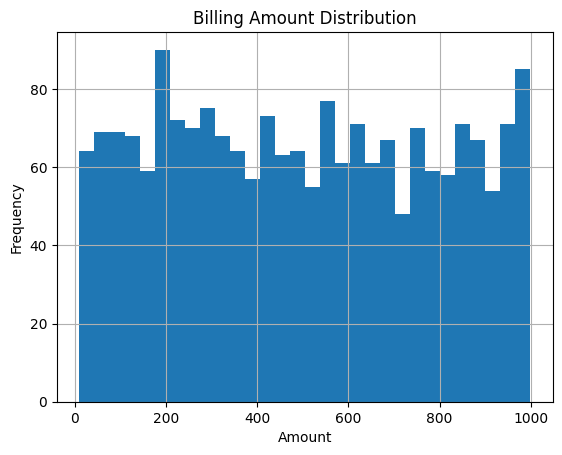

In [16]:
# Total transaction volume
total_txns = len(transactions_df)
print(f"Total Transactions: {total_txns}")

# Transactions per customer
txns_per_customer = transactions_df.groupby('CustomerID').size().describe()
print("\nTransactions per Customer:\n", txns_per_customer)

# Billing amount distribution
print("\nBilling Amount Summary:\n", transactions_df['BillingAmount'].describe())

# Histogram (optional visualization)
import matplotlib.pyplot as plt
transactions_df['BillingAmount'].hist(bins=30)
plt.title("Billing Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Category frequency
category_counts = transactions_df['Category'].value_counts()
print("\nMerchant Category Distribution:\n", category_counts)

# MCC category distribution
merged_mcc = pd.merge(transactions_df[['MCC']], mcc_df, on='MCC', how='left')
print("\nTop MCC Groups:\n", merged_mcc['MCG_Name'].value_counts())

# Check for missing values
missing_report = transactions_df.isnull().sum()
print("\nMissing Values Report:\n", missing_report)  #will be null as we are using syntetic data

# Check for duplicate transactions
duplicates = transactions_df.duplicated().sum()
print(f"\nDuplicate Records: {duplicates}")  #will be null as we are using syntetic data



Merchant Category Distribution:
 Category
Travel           522
Entertainment    502
Food             502
Retail           474
Name: count, dtype: int64

Top MCC Groups:
 MCG_Name
Entertainment    591
Retail           486
Food             471
Travel           452
Name: count, dtype: int64

Missing Values Report:
 CustomerID       0
TxnDate          0
Category         0
BillingAmount    0
TxnLoc           0
MercCountry      0
Gateway          0
Channel          0
MCC              0
Description      0
AcquirerBin      0
dtype: int64

Duplicate Records: 0


Preprocessing Pipeline

In [19]:
# Create customer ID mapping
customer_id_mapping = customers_df[['CustomerID']].copy()
customer_id_mapping['CustomerIntID'] = customer_id_mapping.reset_index().index + 1

# Merge with transactions
transactions_df = transactions_df.merge(customer_id_mapping, on='CustomerID', how='left')


In [20]:
customer_id_mapping

,CustomerID,CustomerIntID
0,CUST0001,1
1,CUST0002,2
2,CUST0003,3
3,CUST0004,4
4,CUST0005,5
...,...,...
495,CUST0496,496
496,CUST0497,497
497,CUST0498,498
498,CUST0499,499


In [21]:
# Standardize string columns
transactions_df['Channel'] = transactions_df['Channel'].str.title()
transactions_df['Gateway'] = transactions_df['Gateway'].str.upper()
transactions_df['Category'] = transactions_df['Category'].str.title()

# Convert date to datetime
transactions_df['TxnDate'] = pd.to_datetime(transactions_df['TxnDate'])


In [22]:
# Check missing
print(transactions_df.isnull().sum())

# Fill missing MCC (if any)
transactions_df['MCC'] = transactions_df['MCC'].fillna(-1).astype(int)

# Remove billing amount outliers (e.g., beyond 99th percentile)
q99 = transactions_df['BillingAmount'].quantile(0.99)
transactions_df = transactions_df[transactions_df['BillingAmount'] <= q99]


CustomerID       0
TxnDate          0
Category         0
BillingAmount    0
TxnLoc           0
MercCountry      0
Gateway          0
Channel          0
MCC              0
Description      0
AcquirerBin      0
CustomerIntID    0
dtype: int64


In [23]:
taxonomy = mcc_df.groupby('MCG_Name')['MCC_Name'].apply(list).to_dict()



In [24]:
#split date
transactions_df['TxnDayOfWeek'] = transactions_df['TxnDate'].dt.day_name()
transactions_df['TxnMonth'] = transactions_df['TxnDate'].dt.month
transactions_df['TxnQuarter'] = transactions_df['TxnDate'].dt.quarter
transactions_df['IsWeekend'] = transactions_df['TxnDayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)


In [25]:
# Convert categorical columns to category dtype
for col in ['Channel', 'Gateway', 'Category', 'TxnDayOfWeek']:
    if col in transactions_df.columns:
        transactions_df[col] = transactions_df[col].astype('category')


In [26]:
transactions_df = transactions_df.sort_values(['CustomerID', 'TxnDate'])
transactions_df['PrevTxnDate'] = transactions_df.groupby('CustomerID')['TxnDate'].shift(1)
transactions_df['DaysSincePrevTxn'] = (transactions_df['TxnDate'] - transactions_df['PrevTxnDate']).dt.days.fillna(-1)

In [28]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                 np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Example: cap BillingAmount outliers
transactions_df = cap_outliers_iqr(transactions_df, 'BillingAmount')




In [29]:
def group_rare_categories(df, column, min_count=10):
    counts = df[column].value_counts()
    rare_cats = counts[counts < min_count].index
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_cats else x)
    return df

transactions_df = group_rare_categories(transactions_df, 'Category', min_count=30)
transactions_df = group_rare_categories(transactions_df, 'Gateway', min_count=20)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Example: scale BillingAmount
transactions_df['BillingAmount_scaled'] = scaler.fit_transform(transactions_df[['BillingAmount']])


In [31]:
# Filter transactions from last 6 months only
cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)
transactions_df = transactions_df[transactions_df['TxnDate'] >= cutoff_date]


Feature Engineering

In [32]:
import numpy as np
import pandas as pd

# Group by Customer and Category to sum spend
customer_spend_cat = transactions_df.groupby(['CustomerID', 'Category'])['BillingAmount'].sum().unstack(fill_value=0)

# Optional: Log transform spend to reduce skewness
customer_spend_cat_log = np.log1p(customer_spend_cat)


C:\Users\joshu\AppData\Local\Temp\ipykernel_7120\3224822585.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_spend_cat = transactions_df.groupby(['CustomerID', 'Category'])['BillingAmount'].sum().unstack(fill_value=0)


In [33]:
customer_spend_cat

Category,Entertainment,Food,Retail,Travel
CustomerID,,,,
CUST0001,0.00,548.45,0.00,0.00
CUST0003,0.00,0.00,953.52,0.00
CUST0004,0.00,86.90,890.25,0.00
CUST0005,0.00,0.00,676.69,0.00
CUST0008,865.32,0.00,0.00,547.62
...,...,...,...,...
CUST0496,354.69,0.00,0.00,0.00
CUST0497,0.00,0.00,1346.07,0.00
CUST0498,983.27,298.74,0.00,0.00


In [34]:
from datetime import timedelta

# Frequency: number of transactions per customer
txn_freq = transactions_df.groupby('CustomerID').size().rename('TransactionCount')

# Recency: days since last transaction relative to max transaction date
max_date = transactions_df['TxnDate'].max()
recency = transactions_df.groupby('CustomerID')['TxnDate'].max().apply(lambda x: (max_date - x).days).rename('RecencyDays')

# Combine temporal features
customer_temporal = pd.concat([txn_freq, recency], axis=1)


In [35]:
customer_temporal

,TransactionCount,RecencyDays
CustomerID,,
CUST0001,1,162
CUST0003,1,37
CUST0004,2,83
CUST0005,1,31
CUST0008,3,27
...,...,...
CUST0496,2,116
CUST0497,2,67
CUST0498,3,31


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_spend_cat_log_scaled = pd.DataFrame(scaler.fit_transform(customer_spend_cat_log), 
                                            columns=customer_spend_cat_log.columns, 
                                            index=customer_spend_cat_log.index)

customer_temporal_scaled = pd.DataFrame(scaler.fit_transform(customer_temporal), 
                                       columns=customer_temporal.columns, 
                                       index=customer_temporal.index)


In [37]:
customer_temporal_scaled

,TransactionCount,RecencyDays
CustomerID,,
CUST0001,0.000000,0.900000
CUST0003,0.000000,0.205556
CUST0004,0.166667,0.461111
CUST0005,0.000000,0.172222
CUST0008,0.333333,0.150000
...,...,...
CUST0496,0.166667,0.644444
CUST0497,0.166667,0.372222
CUST0498,0.333333,0.172222


In [38]:
merchant_popularity = transactions_df.groupby('MCC').agg(
    UniqueCustomers=('CustomerID', 'nunique'),
    TotalTransactions=('CustomerID', 'count'),
    TotalSpend=('BillingAmount', 'sum')
).reset_index()


In [39]:
merchant_hierarchy = mcc_df[['MCC', 'MCG_Name', 'MCC_Name']].copy()
merchant_hierarchy = merchant_hierarchy.rename(columns={'MCG_Name': 'Level1', 'MCC_Name': 'Level2'})
merchant_hierarchy['Level3'] = 'General'


In [40]:
#user item matrix
user_category_matrix = transactions_df.pivot_table(
    index='CustomerID', columns='Category', values='BillingAmount', aggfunc='sum', fill_value=0
)


C:\Users\joshu\AppData\Local\Temp\ipykernel_7120\1994349093.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  user_category_matrix = transactions_df.pivot_table(


In [41]:
user_category_matrix

Category,Entertainment,Food,Retail,Travel
CustomerID,,,,
CUST0001,0.00,548.45,0.00,0.00
CUST0003,0.00,0.00,953.52,0.00
CUST0004,0.00,86.90,890.25,0.00
CUST0005,0.00,0.00,676.69,0.00
CUST0008,865.32,0.00,0.00,547.62
...,...,...,...,...
CUST0496,354.69,0.00,0.00,0.00
CUST0497,0.00,0.00,1346.07,0.00
CUST0498,983.27,298.74,0.00,0.00


In [42]:
user_category_matrix_log = np.log1p(user_category_matrix)


In [43]:
customer_features = pd.concat([
    customer_spend_cat_log_scaled,
    customer_temporal_scaled
], axis=1).fillna(0)


Model Development


In [50]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume: user_category_matrix_log is CustomerID x Category (log-transformed spend)
similarity_matrix = cosine_similarity(user_category_matrix_log)
similarity_df = pd.DataFrame(similarity_matrix, index=user_category_matrix_log.index, columns=user_category_matrix_log.index)

def get_cbf_recommendations(user_id, top_k_users=5, top_n_items=3):
    # Find top-k similar users (excluding self)
    similar_users = similarity_df.loc[user_id].drop(user_id).sort_values(ascending=False).head(top_k_users).index
    # Aggregate spend vectors
    aggregated = user_category_matrix_log.loc[similar_users].mean()
    top_categories = aggregated.sort_values(ascending=False).head(top_n_items).index.tolist()
    return top_categories


In [51]:
from mlxtend.frequent_patterns import apriori, association_rules

# Binary basket: user x category
basket = (transactions_df.groupby(['CustomerID', 'Category'], observed=False)
          .size().unstack(fill_value=0).astype(bool))

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Create a mapping from antecedent -> consequents
from collections import defaultdict

rule_dict = defaultdict(list)
for _, row in rules.iterrows():
    ant = tuple(row['antecedents'])
    cons = list(row['consequents'])
    rule_dict[ant].extend(cons)

# Recommend based on user's current categories
def get_association_recommendations(user_id, top_n=3):
    user_items = basket.loc[user_id]
    owned = set(user_items[user_items == True].index)

    # Find rules where user owns all items in antecedent
    recs = []
    for ant, cons in rule_dict.items():
        if set(ant).issubset(owned):
            recs.extend(cons)

    # Return top unique recommendations not already owned
    recs = [r for r in recs if r not in owned]
    return list(dict.fromkeys(recs))[:top_n]  # remove duplicates


In [52]:
def precision_recall(actual, predicted):
    actual_set, predicted_set = set(actual), set(predicted)
    tp = len(actual_set & predicted_set)
    return (
        tp / len(predicted_set) if predicted_set else 0,
        tp / len(actual_set) if actual_set else 0
    )


In [53]:
from sklearn.metrics import pairwise_distances

def intra_list_diversity(items, item_feature_matrix):
    if len(items) <= 1:
        return 0
    features = item_feature_matrix.loc[items]
    distances = pairwise_distances(features, metric='cosine')
    n = len(items)
    diversity = (distances.sum() - n) / (n*(n-1))
    return diversity


In [54]:
results = []
item_features = user_category_matrix_log.T  # transpose for category-wise vectors

for user in user_category_matrix_log.index[:50]:  # evaluate on a sample
    actual = basket.loc[user]
    actual_items = actual[actual == True].index.tolist()

    cbf_preds = get_cbf_recommendations(user)
    rule_preds = get_association_recommendations(user)

    for model_name, preds in [('CBF', cbf_preds), ('Rules', rule_preds)]:
        p, r = precision_recall(actual_items, preds)
        d = intra_list_diversity(preds, item_features) if preds else 0
        results.append({
            'User': user,
            'Model': model_name,
            'Precision': round(p, 2),
            'Recall': round(r, 2),
            'Diversity': round(d, 2)
        })

results_df = pd.DataFrame(results)
print(results_df.groupby('Model')[['Precision', 'Recall', 'Diversity']].mean())


       Precision  Recall  Diversity
Model                              
CBF       0.6138    0.99     0.1386
Rules     0.0000    0.00    -0.2036


In [55]:
def coverage(all_recommendations, total_items):
    recommended_items = set(item for recs in all_recommendations.values() for item in recs)
    return len(recommended_items) / total_items

# Calculate coverage for both models
cbf_all_recs = {u: get_cbf_recommendations(u) for u in user_category_matrix_log.index[:50]}
rule_all_recs = {u: get_association_recommendations(u) for u in user_category_matrix_log.index[:50]}

cbf_cov = coverage(cbf_all_recs, total_items=len(user_category_matrix_log.columns))
rule_cov = coverage(rule_all_recs, total_items=len(user_category_matrix_log.columns))

print(f"CBF Coverage: {cbf_cov:.2f}")
print(f"Rule Coverage: {rule_cov:.2f}")


CBF Coverage: 1.00
Rule Coverage: 1.00


In [56]:
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np

# User-Item Matrix (Customer x Category)
user_category_matrix = transactions_df.groupby(['CustomerID', 'Category'])['BillingAmount'].sum().unstack(fill_value=0)

# Convert to sparse matrix for ALS
user_mapper = {user: i for i, user in enumerate(user_category_matrix.index)}
item_mapper = {item: i for i, item in enumerate(user_category_matrix.columns)}
user_inv_mapper = {i: user for user, i in user_mapper.items()}
item_inv_mapper = {i: item for item, i in item_mapper.items()}

user_idx = user_category_matrix.index.map(user_mapper)
item_idx = user_category_matrix.columns.map(item_mapper)

sparse_matrix = csr_matrix(user_category_matrix.values)


C:\Users\joshu\AppData\Local\Temp\ipykernel_7120\32591229.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_category_matrix = transactions_df.groupby(['CustomerID', 'Category'])['BillingAmount'].sum().unstack(fill_value=0)


In [57]:
# Compute inverse frequency for each item (category)
category_popularity = np.array((sparse_matrix > 0).sum(axis=0)).flatten()
inv_weights = 1 / (category_popularity + 1e-6)  # add epsilon to avoid div by zero


In [59]:
from implicit.als import AlternatingLeastSquares

# Create confidence matrix with weights (scale implicit data)
confidence_matrix = sparse_matrix.copy()
confidence_matrix.data = confidence_matrix.data * inv_weights[confidence_matrix.indices]

als_model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=15)
als_model.fit(confidence_matrix)


c:\Users\joshu\anaconda3\envs\cudaenv\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 16 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/15 [00:00<?, ?it/s]

In [60]:
from implicit.bpr import BayesianPersonalizedRanking

# BPR works on implicit feedback
bpr_model = BayesianPersonalizedRanking(factors=50, regularization=0.01, learning_rate=0.01, iterations=20)

# Train with same confidence-weighted matrix
bpr_model.fit(confidence_matrix)


  0%|          | 0/20 [00:00<?, ?it/s]

In [68]:
def hybrid_recommend(user_id, top_n=5, alpha=0.5):
    user_index = user_mapper[user_id]
    
    # ALS recommendations (item indices)
    als_items, als_scores = als_model.recommend(user_index, sparse_matrix[user_index], N=top_n*2)
    
    # Map back to item names
    als_items_named = [item_inv_mapper[i] for i in als_items]
    als_df = pd.DataFrame({'Item': als_items_named, 'ALS_Score': als_scores})
    
    # CBF recommendations
    cbf_items = get_cbf_recommendations(user_id)
    cbf_df = pd.DataFrame({'Item': cbf_items, 'CBF_Score': range(len(cbf_items), 0, -1)})
    
    # Merge both
    hybrid_df = pd.merge(als_df, cbf_df, on='Item', how='outer').fillna(0)
    hybrid_df['Final_Score'] = alpha * hybrid_df['ALS_Score'] + (1 - alpha) * hybrid_df['CBF_Score']
    
    return hybrid_df.sort_values('Final_Score', ascending=False).head(top_n)['Item'].tolist()


In [69]:
models = {
    'CBF': lambda u: get_cbf_recommendations(u),
    
    'ALS': lambda u: [
        item_inv_mapper[int(item_id)] 
        for item_id in als_model.recommend(
            user_mapper[u], sparse_matrix[user_mapper[u]], N=5
        )[0]  # unpack the item indices (1st element of tuple)
    ],
    
    'BPR': lambda u: [
        item_inv_mapper[int(item_id)] 
        for item_id in bpr_model.recommend(
            user_mapper[u], sparse_matrix[user_mapper[u]], N=5
        )[0]
    ],
    
    'Hybrid': lambda u: hybrid_recommend(u)
}



results = []



In [70]:
for user in list(user_category_matrix.index)[:50]:  # limit to 50 users for speed
    actual_items = user_category_matrix.columns[user_category_matrix.loc[user] > 0].tolist()

    for model_name, rec_fn in models.items():
        try:
            preds = rec_fn(user)
            p, r = precision_recall(actual_items, preds)
            d = intra_list_diversity(preds, user_category_matrix_log.T) if preds else 0

            results.append({
                'User': user,
                'Model': model_name,
                'Precision': round(p, 2),
                'Recall': round(r, 2),
                'Diversity': round(d, 2)
            })
        except Exception as e:
            print(f"Error in model {model_name} for user {user}: {e}")


In [71]:
results

[{'User': 'CUST0001',
  'Model': 'CBF',
  'Precision': 0.33,
  'Recall': 1.0,
  'Diversity': 0.14},
 {'User': 'CUST0001',
  'Model': 'ALS',
  'Precision': 0.25,
  'Recall': 1.0,
  'Diversity': 0.33},
 {'User': 'CUST0001',
  'Model': 'BPR',
  'Precision': 0.25,
  'Recall': 1.0,
  'Diversity': 0.33},
 {'User': 'CUST0001',
  'Model': 'Hybrid',
  'Precision': 0.0,
  'Recall': 0.0,
  'Diversity': -0.25},
 {'User': 'CUST0003',
  'Model': 'CBF',
  'Precision': 0.33,
  'Recall': 1.0,
  'Diversity': 0.14},
 {'User': 'CUST0003',
  'Model': 'ALS',
  'Precision': 0.25,
  'Recall': 1.0,
  'Diversity': 0.33},
 {'User': 'CUST0003',
  'Model': 'BPR',
  'Precision': 0.25,
  'Recall': 1.0,
  'Diversity': 0.33},
 {'User': 'CUST0003',
  'Model': 'Hybrid',
  'Precision': 0.0,
  'Recall': 0.0,
  'Diversity': -0.25},
 {'User': 'CUST0004',
  'Model': 'CBF',
  'Precision': 0.67,
  'Recall': 1.0,
  'Diversity': 0.14},
 {'User': 'CUST0004',
  'Model': 'ALS',
  'Precision': 0.5,
  'Recall': 1.0,
  'Diversity': 0.